# A comparison of nearest neighbor regularization with pruning

> In this Julia notebook we carry out the tests on nearest neighbor regularization of decision trees reported in this [post](https://ablaom.github.io/regression/2017/10/17/nearest-neighbor-regularization-for-decision-trees.html) of the author. This notebook and associated code is archived in this GitHub [repo](https://github.com/ablaom/NearestNeighbor). The tuning of parameters is not shown here (but see code at end).

Jupyter kernel = `Julia 0.5.2`

&copy; Anthony Blaom 2017

In [ ]:
append!(LOAD_PATH,["./code/", "./"])
addprocs(3)
        
import DataFrames: readtable, writetable, head, size
using Datasets, Regressors, Validation, TreeCollections
using Plots, ADBPlots
pyplot(size=(600,300))

## Bicycle Share data 


In [2]:
df = load("bike_r")

const X = DataTable(df[2:end])
const y = convert(Vector{Float64}, df[:cnt_log])

train, valid = split_bag(1:size(df,1), 70)

base = rms_error(ConstantRegressor(X,y),X,y)
bike_reg = cv_errors(TreeRegressor(regularization=0.82), X, y, n_folds=12, parallel=true, verbose=false)/base
bike_prune = cv_errors(TreeRegressor(min_patterns_split=47), X, y, n_folds=12, parallel=true, verbose=false)/base;

In [3]:
bike_reg_bar = string(mean(bike_reg), "±", 2*std(bike_reg))

"0.29838371521618473±0.025205476189531822"

In [4]:
bike_prune_bar = string(mean(bike_prune), "±", 2*std(bike_prune))

"0.3209381847803929±0.030424944810532567"

In [5]:
?compete

search: compete compare_on_test_set enable_autocomplete_brackets



## `function compete(e0, e1; alpha=0.05)`

Given paired samples `e0` and `e1`, we test the null-hypothesis that the underlying distributions have the same mean, using the significance level `alpha`. Normality of the underlying distributions is assumed and a two-sided t-test applied. 

### Return value

  * '0' if the null is rejected and `e0` has the smaller mean (M1 "wins")
  * '1' if the null is rejected and `e1` has the smaller mean (M0 "wins")
  * 'D' if the null is accepted ("draw")


In [6]:
bike_playoff = compete(bike_prune, bike_reg)

'1'


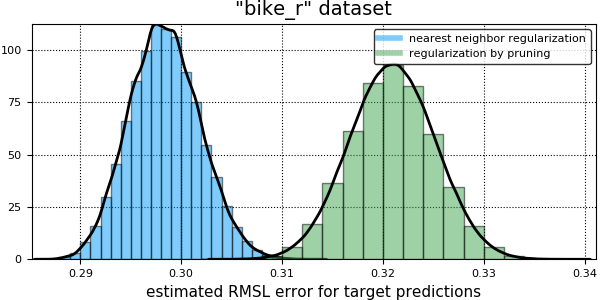

In [7]:
bootstrap_histogram(bike_reg, label="nearest neighbor regularization")
bootstrap_histogram!(bike_prune, label="regularization by pruning")
plot!(xlab="estimated RMSL error for target predictions")
plot!(title="\"bike_r\" dataset")

In [8]:
savefig("assets/bike_r.png")

## Toyota Corolla data

In [ ]:
df = load("toyota_r")

const X = DataTable(df[2:end])
const y = log.(convert(Vector{Float64}, df[:Price]))

train, valid = split_bag(1:size(df,1), 70)

base = rms_error(ConstantRegressor(X,y),X,y)
toyota_reg = cv_errors(TreeRegressor(regularization=0.1), X, y, n_folds=12, parallel=true, verbose=false)/base
toyota_prune = cv_errors(TreeRegressor(min_patterns_split=2), X, y, n_folds=12, parallel=true, verbose=false)/base;

In [10]:
toyota_reg_bar = string(mean(toyota_reg), "±", 2*std(toyota_reg))

"0.27438456847772813±0.21374401389050354"

In [11]:
toyota_prune_bar = string(mean(toyota_prune), "±", 2*std(toyota_prune))

"0.27761809327791437±0.2204855099944876"

In [12]:
toyota_playoff = compete(toyota_prune, toyota_reg)

'D'


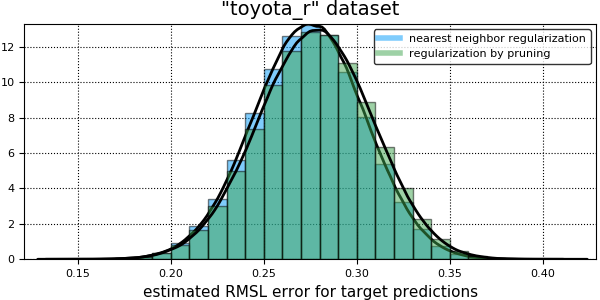

In [13]:
bootstrap_histogram(toyota_reg, label="nearest neighbor regularization")
bootstrap_histogram!(toyota_prune, label="regularization by pruning")
plot!(xlab="estimated RMSL error for target predictions")
plot!(title="\"toyota_r\" dataset")

In [14]:
savefig("assets/toyota_r.png")

## Ames House Price data

In [ ]:
df = load("ames_12r")

const X = DataTable(df[2:end])
const y = convert(Vector{Float64}, df[:target])

train, valid = split_bag(1:size(df,1), 70)

ames_reg = cv_errors(TreeRegressor(regularization=0.89), X, y, n_folds=12, parallel=true, verbose=false)/base
ames_prune = cv_errors(TreeRegressor(min_patterns_split=33), X, y, n_folds=12, parallel=true, verbose=false)/base;

In [16]:
ames_reg_bar = string(mean(ames_reg), "±", 2*std(ames_reg))

"0.6964992888608209±0.16623968891544816"

In [17]:
ames_prune_bar = string(mean(ames_prune), "±", 2*std(ames_prune))

"0.7695328342656667±0.1556861243581214"

In [18]:
ames_playoff = compete(ames_prune, ames_reg)

'1'


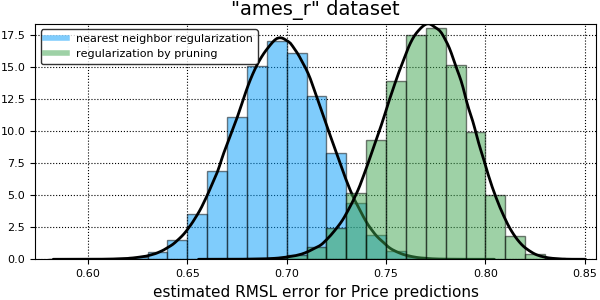

In [19]:
bootstrap_histogram(ames_reg, label="nearest neighbor regularization")
bootstrap_histogram!(ames_prune, label="regularization by pruning")
plot!(xlab="estimated RMSL error for Price predictions")
plot!(title="\"ames_r\" dataset")

In [20]:
savefig("assets/ames_r.png")

## Abalone data

In [ ]:
df = load("abalone_r")

const X = DataTable(df[2:end])
const y = log(convert(Vector{Float64}, df[:rings]))

train, valid = split_bag(1:size(df,1), 70)

base = cv_error(ConstantRegressor(),X,y,n_folds=12)
abalone_reg = cv_errors(TreeRegressor(regularization=0.933), X, y, n_folds=12, parallel=true, verbose=false)/base
abalone_prune = cv_errors(TreeRegressor(min_patterns_split=135), X, y, n_folds=12, parallel=true, verbose=false)/base;

In [22]:
abalone_reg_bar = string(mean(abalone_reg), "±", 2*std(abalone_reg))

"0.6364962064332577±0.07429607245929386"

In [23]:
abalone_prune_bar = string(mean(abalone_prune), "±", 2*std(abalone_prune))

"0.6324600775425029±0.06640888915532654"

In [24]:
abalone_playoff = compete(abalone_prune, abalone_reg)

'D'


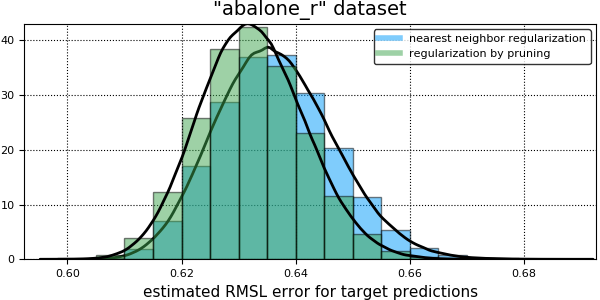

In [25]:
bootstrap_histogram(abalone_reg, label="nearest neighbor regularization")
bootstrap_histogram!(abalone_prune, label="regularization by pruning")
plot!(xlab="estimated RMSL error for target predictions")
plot!(title="\"abalone_r\" dataset")

In [26]:
savefig("assets/abalone_r.png")

## Power Plant data

In [ ]:
df = load("power_r")

const X = DataTable(df[2:end])
const y = convert(Vector{Float64}, df[:PE])

train, valid = split_bag(1:size(df,1), 70)

base = cv_error(ConstantRegressor(),X,y,n_folds=12)
power_reg = cv_errors(TreeRegressor(regularization=0.78), X, y, n_folds=12, parallel=true, verbose=false)/base
power_prune = cv_errors(TreeRegressor(min_patterns_split=47), X, y, n_folds=12, parallel=true, verbose=false)/base;

In [28]:
power_reg_bar = string(mean(power_reg), "±", 2*std(power_reg))

"0.21978953598488296±0.027275500413165718"

In [29]:
power_prune_bar = string(mean(power_prune), "±", 2*std(power_prune))

"0.23449335385086967±0.03148810200284947"

In [30]:
power_playoff = compete(power_prune, power_reg)

'1'


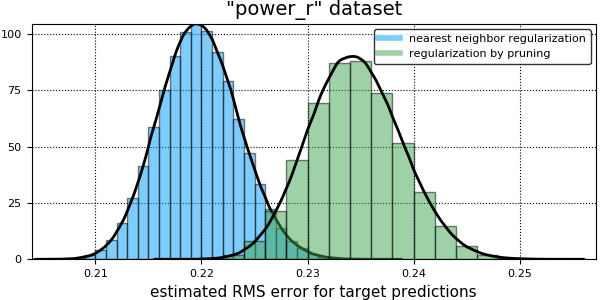

In [31]:
bootstrap_histogram(power_reg, label="nearest neighbor regularization")
bootstrap_histogram!(power_prune, label="regularization by pruning")
plot!(xlab="estimated RMS error for target predictions")
plot!(title="\"power_r\" dataset")

In [32]:
savefig("assets/power_r.png")

## Concrete data

In [ ]:
df = load("concrete_r")

const X = DataTable(df[2:end])
const y = convert(Vector{Float64}, df[:strength])

train, valid = split_bag(1:size(df,1), 70)

base = cv_error(ConstantRegressor(),X,y,n_folds=12)
concrete_reg = cv_errors(TreeRegressor(regularization=0.615), X, y, n_folds=12, parallel=true, verbose=false)/base
concrete_prune = cv_errors(TreeRegressor(min_patterns_split=7), X, y, n_folds=12, parallel=true, verbose=false)/base;

In [34]:
concrete_reg_bar = string(mean(concrete_reg), "±", 2*std(concrete_reg))

"0.34753427676678195±0.10460581600498448"

In [35]:
concrete_prune_bar = string(mean(concrete_prune), "±", 2*std(concrete_prune))

"0.3665561868566472±0.1267936518297667"

In [36]:
concrete_playoff = compete(concrete_prune, concrete_reg)

'1'


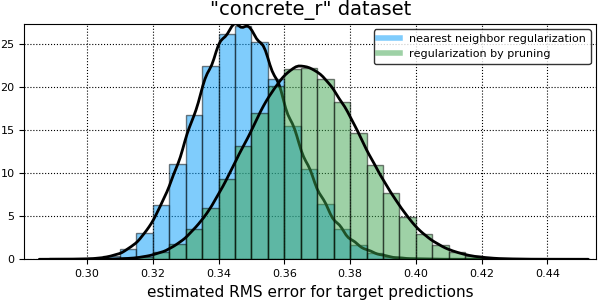

In [37]:
bootstrap_histogram(concrete_reg, label="nearest neighbor regularization")
bootstrap_histogram!(concrete_prune, label="regularization by pruning")
plot!(xlab="estimated RMS error for target predictions")
plot!(title="\"concrete_r\" dataset")

In [38]:
savefig("assets/concrete_r.png")

## Code used for tuning parameters

In [39]:
# quick tune:
# u, v = @getfor rr linspace(0,0.99,200) rms_error(TreeRegressor(regularization=rr,X,y,train),X,y,valid)/base
# fine tune:
# u,v = @getfor rr linspace(0.5,0.7,41) cv_error(TreeRegressor(regularization=rr), X, y, parallel=true, verbose=false, n_folds=12)/base
# similar for pruning:
# u, v = @getfor rr 2:200 rms_error(TreeRegressor(min_patterns_split=rr,X,y,train),X,y,valid)/base
# u,v = @getfor rr 2:20 cv_error(TreeRegressor(min_patterns_split=rr), X, y, parallel=true, verbose=false, n_folds=12)/base